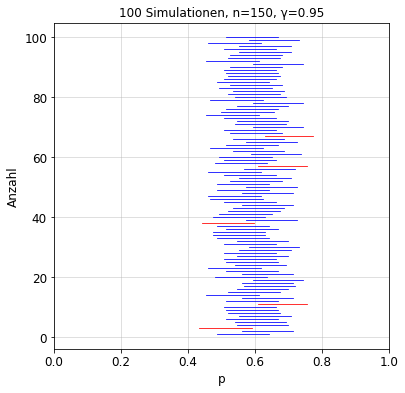

Anzahl der Intervalle, die p nicht überdecken: 5 (5.00%)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Wilson-Funktion
def wilson(h, n, gamma):
    z = norm.ppf((1 + gamma) / 2)
    z2_n = z**2 / n  # Vorab berechnet
    a = 1 / (1 + z2_n)
    term = a * z * np.sqrt((1 / (4 * n)) * (1 - a) / a + h * (1 - h) / n)
    p_u = (1 - a) * 0.5 + a * h - term
    p_o = (1 - a) * 0.5 + a * h + term
    return p_u, p_o

# Simulationsfunktion
def KISimulationen(n, p, gamma, w):
    plt.figure(figsize=(6, 6))
    treffer = np.random.binomial(n, p, w)  # Vektorisiert
    anz = 0
    
    for i, t in enumerate(treffer, start=1):
        lower_p, upper_p = wilson(t / n, n, gamma)
        color = "blue" if lower_p <= p <= upper_p else "red"
        plt.plot([lower_p, upper_p], [i, i], linewidth=0.8, color=color)
        anz += color == "red"

    plt.title(f"{w} Simulationen, n={n}, γ={gamma}", fontsize=12)
    plt.xlabel("p", fontsize=12)
    plt.ylabel("Anzahl", fontsize=12)
    plt.xticks(fontsize=12)  # Größere Achsenbeschriftung
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)
    plt.xlim(0, 1)
    plt.show()

    print(f"Anzahl der Intervalle, die p nicht überdecken: {anz} ({anz / w * 100:.2f}%)")

# Eingabe
n = 150
p = 0.6
gamma = 0.95
anz_KI = 100
#
# Funktionsaufruf zum Starten der Simulation
KISimulationen(n, p, gamma, anz_KI)

**Erklärung zur Simulation von Konfidenzintervallen mit Python**

### **Einleitung**
Dieses Python-Programm simuliert die Berechnung und Visualisierung von Konfidenzintervallen für eine Binomialverteilung. Es nutzt das Wilson-Konfidenzintervall, um die Wahrscheinlichkeit zu bestimmen, mit der ein geschätzter Parameter (z. B. der Anteil erfolgreicher Treffer) das wahre, unbekannte p abdeckt. Das Programm ist besonders nützlich für ein besseres Verständnis von statistischer Unsicherheit und Zufallsschwankungen.

---

### **1. Import der notwendigen Bibliotheken**
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
```
**Erklärung:**
- `numpy (np)`: Wird für numerische Berechnungen genutzt, insbesondere für Zufallszahlen.
- `matplotlib.pyplot (plt)`: Dient zur Visualisierung der Simulationsergebnisse.
- `scipy.stats.norm`: Enthält Funktionen für die Normalverteilung, die für das Wilson-Konfidenzintervall benötigt wird.

---

### **2. Definition der Wilson-Konfidenzintervall-Funktion**
```python
def wilson(h, n, gamma):
    z = norm.ppf((1 + gamma) / 2)  # Kritischer Wert der Normalverteilung
    z2_n = z**2 / n  # Vorab berechneter Wert zur Effizienzsteigerung
    a = 1 / (1 + z2_n)
    term = a * z * np.sqrt((1 / (4 * n)) * (1 - a) / a + h * (1 - h) / n)
    p_u = (1 - a) * 0.5 + a * h - term  # Untere Grenze
    p_o = (1 - a) * 0.5 + a * h + term  # Obere Grenze
    return p_u, p_o
```
**Erklärung:**
- Diese Funktion berechnet die Grenzen eines Konfidenzintervalls für einen gegebenen Anteil `h = Treffer/n`, die Stichprobengröße `n` und das Konfidenzniveau `gamma`.
- `norm.ppf((1 + gamma) / 2)`: Gibt den z-Wert zur passenden Wahrscheinlichkeit der Standardnormalverteilung zurück (z.B. für 95% Konfidenz: z ≈ 1.96).
- Die Formel stammt aus der Wilson-Score-Methode, die bei kleinen Stichproben bessere Ergebnisse liefert als die klassische Normalapproximation.

---

### **3. Simulationsfunktion zur Darstellung der Konfidenzintervalle**
```python
def KISimulationen(n, p, gamma, w):
    plt.figure(figsize=(6, 6))  # Größe des Diagramms
    treffer = np.random.binomial(n, p, w)  # Erzeugung von w Binomialverteilungen
    anz = 0  # Zähler für Intervalle, die p nicht enthalten
    
    for i, t in enumerate(treffer, start=1):
        lower_p, upper_p = wilson(t / n, n, gamma)
        color = "blue" if lower_p <= p <= upper_p else "red"
        plt.plot([lower_p, upper_p], [i, i], linewidth=0.8, color=color)
        anz += color == "red"

    plt.title(f"{w} Simulationen, n={n}, γ={gamma}", fontsize=12)
    plt.xlabel("p", fontsize=12)
    plt.ylabel("Anzahl", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)
    plt.xlim(0, 1)
    plt.show()

    print(f"Anzahl der Intervalle, die p nicht überdecken: {anz} ({anz / w * 100:.2f}%)")
```
**Erklärung:**
- `np.random.binomial(n, p, w)`: Simuliert `w` Experimente mit `n` Versuchen, wobei jedes mit Wahrscheinlichkeit `p` erfolgreich ist.
- In der Schleife:
  - `for i, t in enumerate(treffer, start=1):` Schleife, die alle Treffer durchläuft und durch den `enumarate`-Befehl zum i-ten Treffer die Stelle i zur Verfügung stellt, mit i=1 als Anfang, sonst i=0
  - Berechnung des Konfidenzintervalls für jedes simulierte Treffer-Verhältnis.
  - Farbgebung:
    - **Blau:** Das wahre p liegt im berechneten Intervall.
    - **Rot:** Das wahre p liegt **außerhalb** des Intervalls (Fehlerrate sichtbar).
- Das Diagramm zeigt w Konfidenzintervalle überlagert.
- Am Ende wird die Anzahl der nicht enthaltenden Intervalle ausgegeben.

---

### **4. Aufruf der Simulation**
```python
n = 150
p = 0.6
gamma = 0.95
anz_KI = 100
KISimulationen(n, p, gamma, anz_KI)
```
**Parameter-Erklärung:**
- `n = 150`: Anzahl der Versuche pro Simulation.
- `p = 0.6`: Wahre Erfolgswahrscheinlichkeit.
- `gamma = 0.95`: Konfidenzniveau (95%-Intervall).
- `anz_KI = 100`: Anzahl der durchgeführten Simulationen.

---

### **5. Interpretation der Ergebnisse**
- In der Ausgabe sehen wir **100 Konfidenzintervalle**, die um das geschätzte p herum gezeichnet sind.
- **Blau bedeutet, dass p innerhalb des Intervalls liegt.**
- **Rot bedeutet, dass das wahre p nicht vom Intervall erfasst wurde.**
- Die Fehlerrate sollte ungefähr 5% betragen, da das Konfidenzniveau 95% beträgt.

**Beispielhafte Ausgabe:**
```
Anzahl der Intervalle, die p nicht überdecken: 5 (5.00%)
```
Das bedeutet, dass genau 5 von 100 Intervallen das wahre p nicht enthalten haben – ein realistisches Ergebnis für ein 95%-Konfidenzintervall.

---

### **Fazit**
Dieses Programm zeigt anschaulich, wie Konfidenzintervalle funktionieren und welche Unsicherheiten in Schätzungen enthalten sind. Durch die zufälligen Simulationen wird deutlich, dass **nicht jedes Intervall den wahren Wert enthält**, sondern nur im Durchschnitt 95% aller Intervalle (bei γ = 0.95).

